# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [83]:
# Import relevant libraries
# Small changes in first two cells as mentioned in section 1
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [84]:
browser = Browser('chrome', executable_path=ChromeDriverManager().install())

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [85]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [86]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [87]:
# Extract all rows of data
# We can do this using pandas basically instantly without having to do the for loops stuff in Step 3.
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')[0]
# Adding a 0 because it appears there is another table on the page. The one I want is the first table, hence [0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [88]:
# Reset axis to the ID
df.set_index('id', inplace=True)
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [89]:
# The rest of this section does not need to be completed as the dataframe is already constructed.
# Create an empty list
# Loop through the scraped data to create a list of rows
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Confirm DataFrame was created successfully

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [90]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   terrestrial_date  1867 non-null   object 
 1   sol               1867 non-null   int64  
 2   ls                1867 non-null   int64  
 3   month             1867 non-null   int64  
 4   min_temp          1867 non-null   float64
 5   pressure          1867 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 102.1+ KB


In [91]:
# Change data types for data analysis
# Only the data needs to be changed to a datetime format
df.terrestrial_date = pd.to_datetime(df.terrestrial_date, dayfirst=True)

In [92]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [93]:
# 1. How many months are there on Mars?
# That is just the max number from the 'months' column
df.month.max()

12

In [94]:
# 2. How many Martian days' worth of data are there?
# Martian days are counted in sols so it is just the count of unique sol values.
df.sol.nunique()

1867

In [95]:
# 3. What is the average low temperature by month?
avg_min_month = df.groupby('month')['min_temp'].mean()
avg_min_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

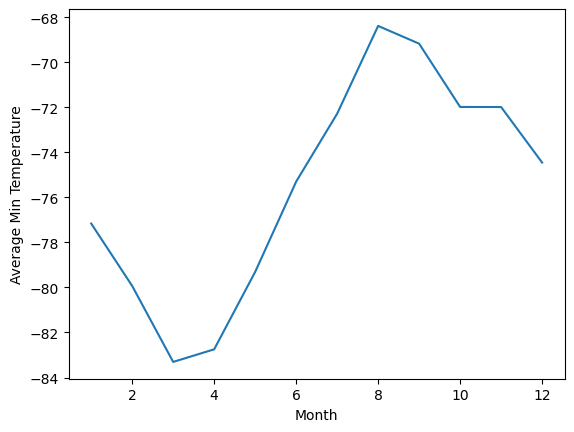

In [96]:
# Plot the average temperature by month
plt.plot(avg_min_month)
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.show()

In [97]:
# Identify the coldest and hottest months in Curiosity's location
# According to the chart, the coldest month is month 3 and the hottest month is month 8.

In [98]:
# 4. Average pressure by Martian month
avg_pres = df.groupby('month')['pressure'].mean()
avg_pres

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

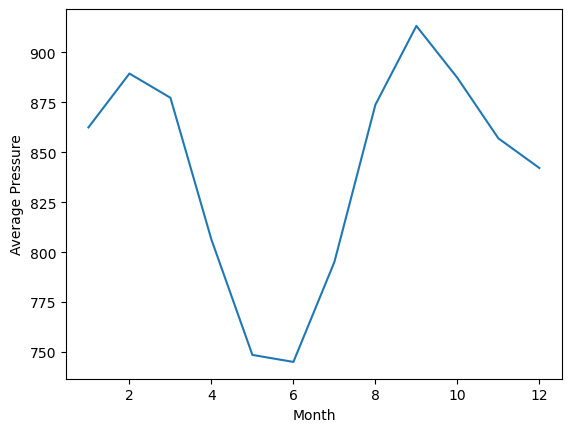

In [99]:
# Plot the average pressure by month
plt.plot(avg_pres)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

In [100]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# We can get this by taking the max terrestrial days minus the minimum terrestrial days

# We can find the dates between using a few loc functions
early_date = df.loc[(df['ls'] == 0) & (df['month'] == 1)]
late_date = df.loc[(df['ls'] == df.ls.max()) & (df['month'] == 12)]
print(early_date)
print(late_date)
# Now we can look at the dates between by subtracting sols right before and after a new year
mars_year = 1018-351
print(f"The estimated number of days = ",mars_year)

     terrestrial_date   sol  ls  month  min_temp  pressure
id                                                        
320        2013-08-01   351   0      1     -75.0     853.0
319        2013-08-02   352   0      1     -77.0     854.0
954        2015-06-19  1019   0      1     -81.0     849.0
938        2015-06-20  1020   0      1     -63.0     832.0
1606       2017-05-06  1688   0      1     -76.0     840.0
1610       2017-05-07  1689   0      1     -75.0     840.0
     terrestrial_date   sol   ls  month  min_temp  pressure
id                                                         
316        2013-07-30   349  359     12     -75.0     852.0
318        2013-07-31   350  359     12     -76.0     853.0
955        2015-06-17  1017  359     12     -78.0     850.0
956        2015-06-18  1018  359     12     -79.0     850.0
1607       2017-05-04  1686  359     12     -75.0     838.0
1608       2017-05-05  1687  359     12     -75.0     838.0
The estimated number of days =  667


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [101]:
# Write the data to a CSV
df.to_csv('Mars Data', index=False)

In [102]:
browser.quit()